# Tạo dữ liệu Dummy

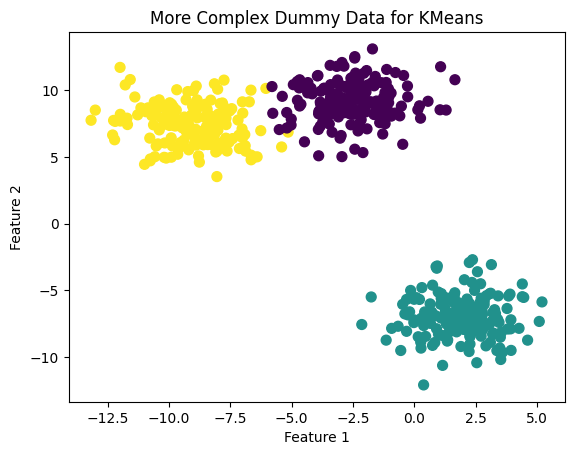

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


# Generate dummy data for KMeans
n_samples = 500
n_features = 3
n_centers = 3
random_state = 42
cluster_std = 1.5 # Increase the standard deviation to make clusters less distinct

X, y = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=random_state, cluster_std=cluster_std)

# Visualize the dummy data (only showing the first two features for 2D visualization)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title("More Complex Dummy Data for KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Cài đặt from scratch

In [24]:
def distance(a, b):
  return (a[0]-b[0])**2 + (a[1] - b[1])**2

In [27]:
K = 3
centroids = np.random.rand(K, 2)

print(centroids)

[[0.1325806  0.04856496]
 [0.63876839 0.35827563]
 [0.5575448  0.10564713]]


1


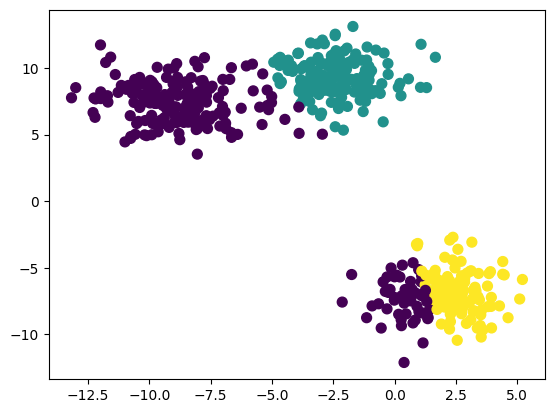

1


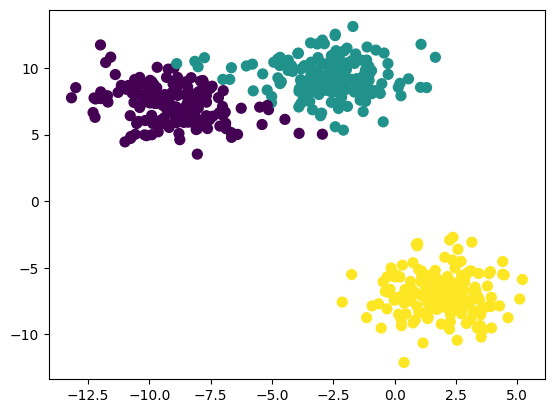

1


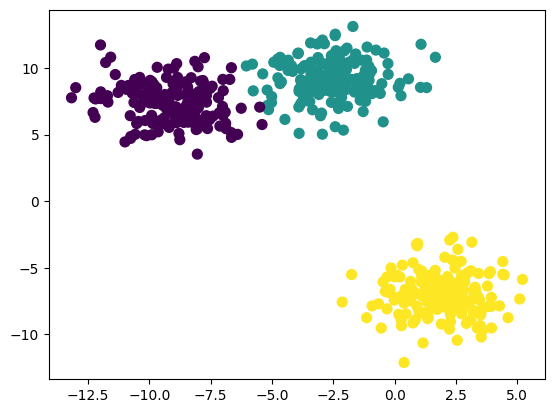

In [28]:
labels = [-1 for _ in X]
step = 1
while True:
  for i in range(len(X)):
    labels[i] = np.argmin([distance(X[i], centroid) for centroid in centroids])
  new_centroids = [np.mean([X[i] for i in range(len(X)) if labels[i] == j ], axis=0) for j in range(K)]
  if np.array_equal(new_centroids, centroids):
    break
  centroids = new_centroids
  print(step)
  plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
  plt.show()

# Cài bằng Scikit Learn

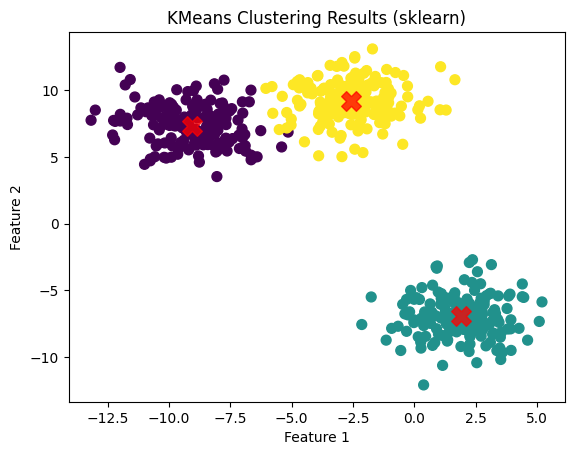

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize and train KMeans
kmeans = KMeans(n_clusters=K, random_state=random_state, n_init=10) # Use the previously defined K and random_state
kmeans.fit(X)

# Get the cluster labels and centroids
sklearn_labels = kmeans.labels_
sklearn_centroids = kmeans.cluster_centers_

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, s=50, cmap='viridis')
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("KMeans Clustering Results (sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()